# **PREGUNTA Nº 1: REALIZAR UN ANÁLISIS EXPLORATORIO DE LOS DATOS PARA COMPRENDER LA CARACTERÍSTICA Y LA DISTRIBUCIÓN DE LOS DATOS**.

In [ ]:
#IMPORTACIÓN DE LIBRERÍAS

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#IMPORTACIÓN Y LECTURA DE LOS PRIMEROS 5 REGISTROS DEL DATASET.

df_telco_customer = pd.read_excel('Telco-Customer-Churn.xlsx')
df_telco_customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
#GENERACIÓN DE COPIA DEL DF PARA SU POSTERIOR MANIPULACIÓN

df_telco_customer = df_telco_customer.copy()

In [ ]:
#REVISIÓN DEL NÚMERO DE FILAS Y COLUMNAS.

df_telco_customer.shape

(7043, 21)

In [ ]:
#REVISIÓN DEL NOMBRE DE LAS VARIABLES.

df_telco_customer.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#REVISIÓN DE LOS DATOS DEL DATASET (VALORES NULOS, TIPO DE DATO, RANGO, ÍNDICE, VARIABLES, MEMORIA, ENTRE OTROS).

df_telco_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#REVISIÓN DE VALORES DEL DATASET.

df_telco_customer.value_counts()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
0002-ORFBO  Female  0              Yes      Yes         9       Yes           No                DSL              No                   Yes                  No                   Yes                  Yes                  No                   One year        Yes               Mailed check               65.60           593.30        No       1
6619-RPLQZ  Female  0              Yes      Yes         45      Yes           No                No               No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  Two year        No                Mailed check               20.85           892.15 

In [ ]:
#DESCRIPCIÓN DE VARIABLES NUMÉRICAS.

df_telco_customer.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#REVISIÓN DE REGISTROS DUPLICADOS EN EL DATAFRAME.

df_telco_customer.duplicated().sum()

0

In [ ]:
#REVISIÓN DE DATOS NULOS Y SUMA DE LOS MISMOS.

df_telco_customer.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#VALIDACIÓN DE DATOS NEGATIVOS.

df_telco_customer[
    (df_telco_customer.SeniorCitizen < 0)
    & (df_telco_customer.tenure < 0)
    & (df_telco_customer.MonthlyCharges < 0)
    & (df_telco_customer.TotalCharges < 0)
]
df_telco_customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
#VALIDACIÓN DE CAMPOS NEGATIVOS

df_telco_customer[
    (df_telco_customer.SeniorCitizen < 0)
    | (df_telco_customer.tenure < 0)
    | (df_telco_customer.MonthlyCharges < 0)
    | (df_telco_customer.TotalCharges < 0)
]
df_telco_customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
#VALIDACIÓN DE RANGOS Y VALORES ESPECÍFICOS EN COLUMNAS NUMÉRICAS

print("Valores únicos en la columna 'SeniorCitizen':", df_telco_customer['SeniorCitizen'].unique())
print("\nValores únicos en la columna 'tenure':", df_telco_customer['tenure'].unique())
print("\nValores únicos en la columna 'MonthlyCharge':", df_telco_customer['MonthlyCharges'].unique())
print("\nValores únicos en la columna 'TotalCharges':", df_telco_customer['TotalCharges'].unique())


Valores únicos en la columna 'SeniorCitizen': [0 1]

Valores únicos en la columna 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Valores únicos en la columna 'MonthlyCharge': [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

Valores únicos en la columna 'TotalCharges': [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


#REVISIÓN Y ANÁLISIS DE LA VARIABLE OBJETIVO "CHURN".

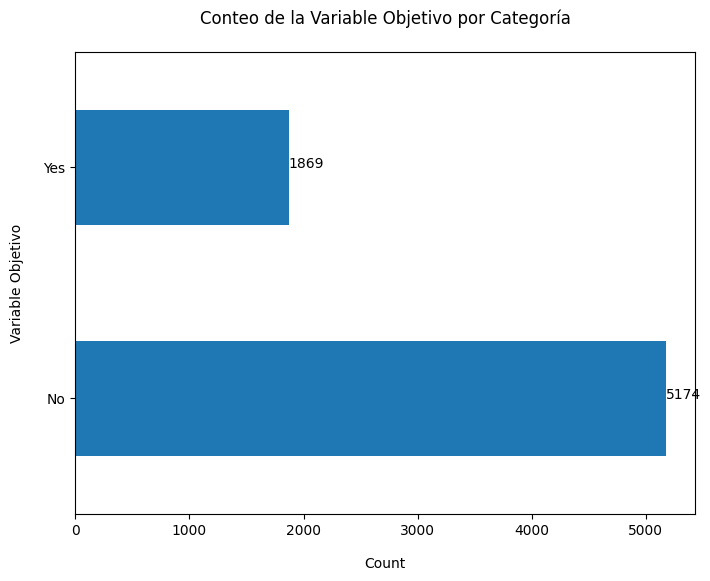

In [ ]:
#GRAFICACIÓN DE LA VARIABLE OBJETIVO "CHURN".

#Conteo de la variable 'Churn'.
churn_counts = df_telco_customer['Churn'].value_counts()

plt.figure(figsize=(8, 6))
churn_counts.plot(kind='barh')
plt.xlabel('Count', labelpad=14)
plt.ylabel('Variable Objetivo', labelpad=14)
plt.title('Conteo de la Variable Objetivo por Categoría', pad=20)

#Mostrar nombres de las categorías y conteos en las barras.
for index, value in enumerate(churn_counts):
    plt.text(value, index, str(value))
plt.show()


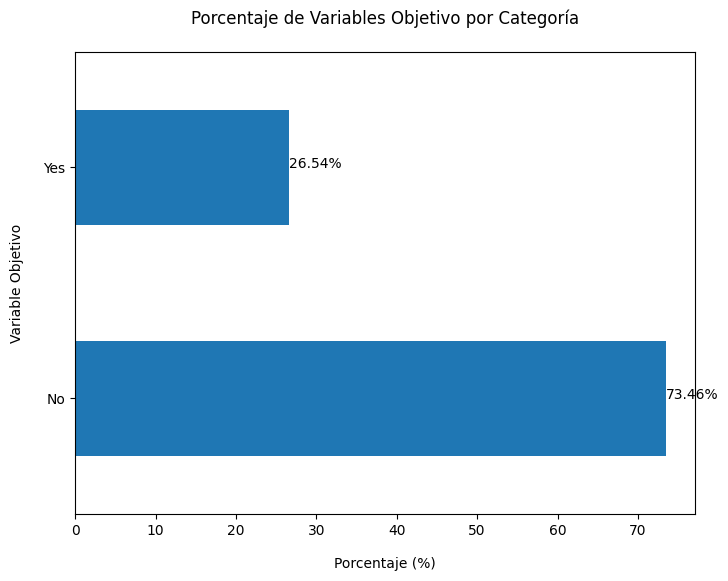

In [ ]:
#CÁLCULO DEL PORCENTAJE DE AMBAS CATEGORÍAS DE LA VARIABLE OBJETIVO "CHURN".

#Cálculo del porcentaje de cada categoría de la variable 'Churn'.
churn_percentage = 100 * df_telco_customer['Churn'].value_counts() / len(df_telco_customer['Churn'])

#Graficación.
plt.figure(figsize=(8, 6))
churn_percentage.plot(kind='barh')
plt.xlabel('Porcentaje (%)', labelpad=14)
plt.ylabel('Variable Objetivo', labelpad=14)
plt.title('Porcentaje de Variables Objetivo por Categoría', pad=20)

#Loop para mostrar los porcentajes en las barras del plot.
for index, value in enumerate(churn_percentage):
    plt.text(value, index, f'{value:.2f}%')
plt.show()


In [ ]:
#REVISIÓN DE LOS VALORES DE LA VARIABLE "CHURN".

df_telco_customer['Churn'].value_counts()
#Se visualiza que los datos se encuentran desequilibrados. Se procederá posteriormente a su normalización.

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# **PREGUNTA Nº 2: PREPOCESAR LOS DATOS, INCLUYENDO LA LIMPIEZA, LA TRANSFORMACIÓN Y LA NORMALIZACIÓN DE LAS CARACTERÍSTICAS SEGÚN SEA NECESARIO.**


In [ ]:
#REVISIÓN DEL TIPO DE DATO DE LAS COLUMNAS DEL DF_TELCO_CUSTOMER.

df_telco_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


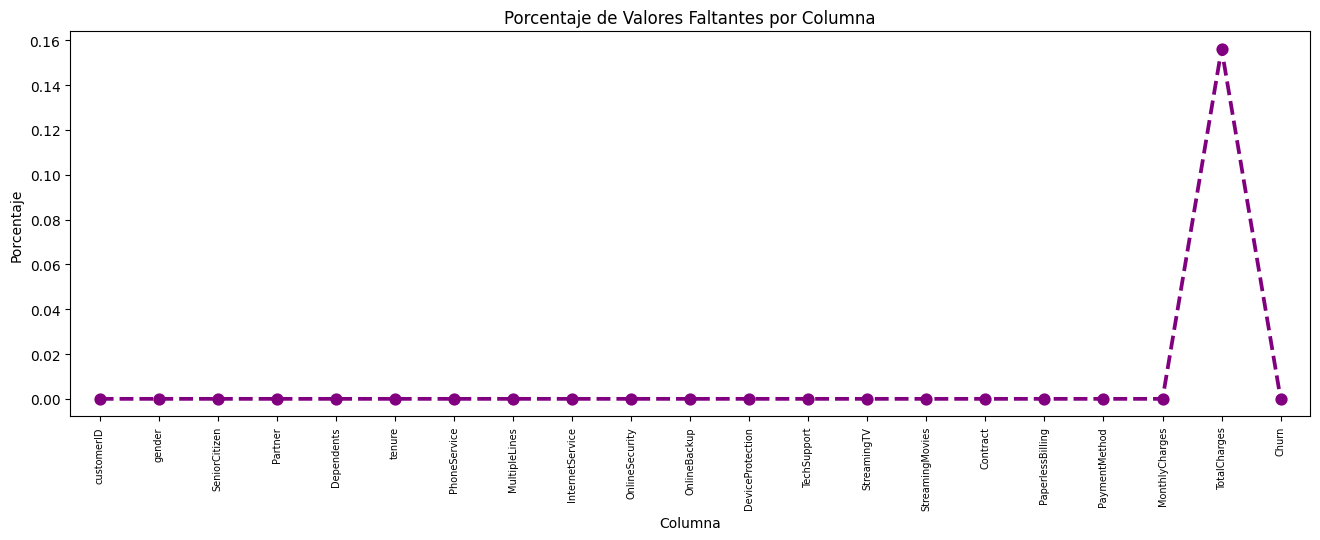

In [ ]:
#REVISIÓN Y GRAFICACIÓN DE VALORES PERDIDOS

#Calculo del porcentaje de valores faltantes por columna
missing_values = pd.DataFrame((df_telco_customer.isnull().sum()) * 100 / df_telco_customer.shape[0]).reset_index()
missing_values.columns = ['Columna', 'Porcentaje']

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Columna', y='Porcentaje', data=missing_values, color='purple', markers='o', linestyles='--')
plt.xticks(rotation=90, fontsize=7)
plt.title('Porcentaje de Valores Faltantes por Columna')
plt.xlabel('Columna')
plt.ylabel('Porcentaje')
plt.show()

In [ ]:
#REVISIÓN DE LAS FILAS DE LA VARIABLE "TOTALCHARGES" CON VALORES NAN.

df_telco_customer.loc[df_telco_customer['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


#EXPLICACIÓN DEL MÉTODO APLICADO A LOS VALORES PERDIDOS.


---
####En consideración a que se trata de 11 registros NAN, de 7043, se procederá a su reemplazo por valores 0, toda vez que por ser en bajo porcentaje, no resulta riesgoso para la manipulación del data.


In [ ]:
#REEMPLAZO DE VALORES NAN POR 0.

df_telco_customer.fillna(0, inplace=True)
df_telco_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#CREACIÓN DE DATAFRAME CON VARIABLES NUMÉRICAS DEL DF_TELCO_CUSTOMER.

variables_numéricas = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
numerical_variables = df_telco_customer[variables_numéricas]
numerical_variables.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


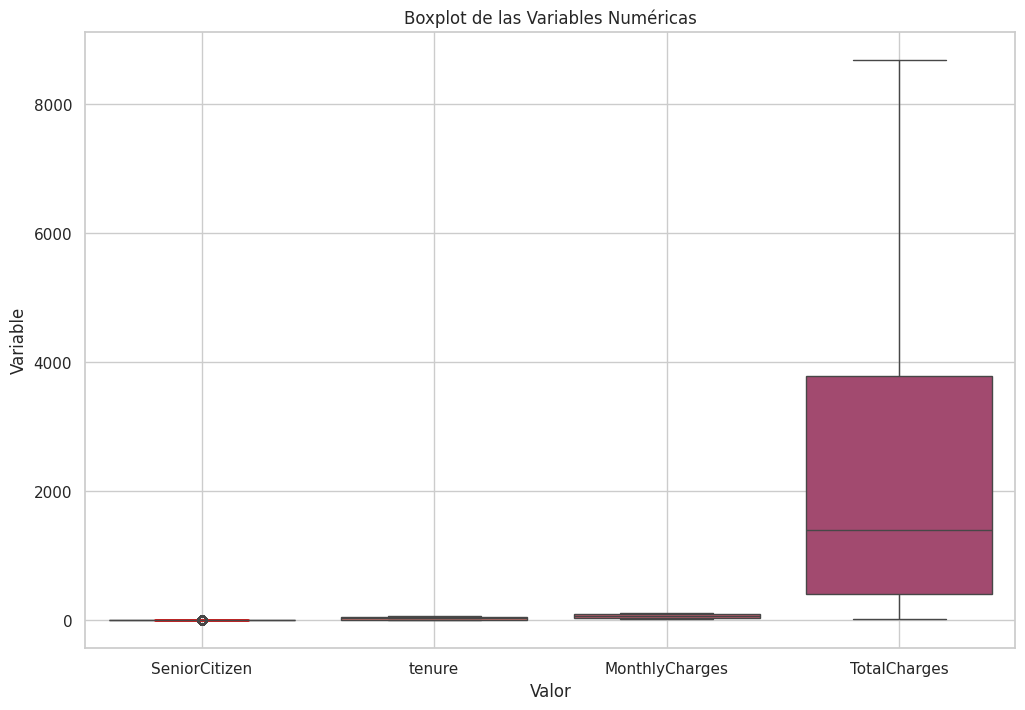

In [ ]:
#VISUALIZACIÓN MEDIANTE BOXPLOT DE LAS VARIABLES NUMÉRICAS DEL DATAFRAME CON VALORES NAN, NULL Y/O OUTLIERS.

sns.set(style='whitegrid', palette='flare')                                     #Style del gráfico.

plt.figure(figsize=(12, 8))                                                     #Tamaño de las figuras.
boxplot = sns.boxplot(data = numerical_variables, orient='v')                   #Posicionamiento horizontal

median = boxplot.lines[2]                                                       #Etiquetas.
median.set(color='red', linewidth=2)                                            #Color y grosor de la línea de la mediana


plt.grid(axis='x')                                                              #Cuadrícula del eje X.

plt.title('Boxplot de las Variables Numéricas')   #Título del gráfico
plt.xlabel('Valor')                                                             #Etiqueta del eje x
plt.ylabel('Variable')                                                          #Etiqueta del eje y

plt.show()

In [ ]:
#CÁLCULO DE OUTLIERS EN LA VARIABLE "SENIORCITIZEN"

# Cálculo de los cuartiles
Q1 = df_telco_customer['SeniorCitizen'].quantile(0.25)
Q3 = df_telco_customer['SeniorCitizen'].quantile(0.75)

# Cálculo del rango intercuartílico (IQR)
IQR = Q3 - Q1

# Cálculo de los límites inferior y superior para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtro para los valores que están fuera de los límites calculados.
outliers_hr = df_telco_customer[(df_telco_customer['SeniorCitizen'] < limite_inferior) | (df_telco_customer['SeniorCitizen'] > limite_superior)]

# Impresión de las estadísticas descriptivas de la columna 'heartRate', incluyendo los outliers
print(f'El limite inferior de la variable es de: {limite_inferior}')
print(f'El limite superior de la variable es de: {limite_superior}')
print('\nValores atípicos (outliers) en la columna "SeniorCitizen":')
print(outliers_hr['SeniorCitizen'])

El limite inferior de la variable es de: 0.0
El limite superior de la variable es de: 0.0

Valores atípicos (outliers) en la columna "SeniorCitizen":
20      1
30      1
31      1
34      1
50      1
       ..
7023    1
7029    1
7031    1
7032    1
7041    1
Name: SeniorCitizen, Length: 1142, dtype: int64


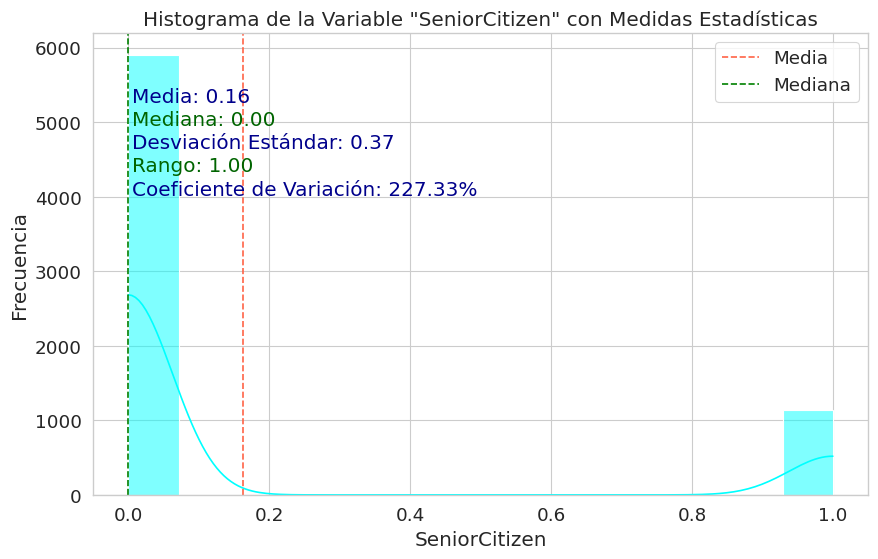

In [ ]:
#CREACIÓN DE HISTOGRAMA DE LA VARIABLE "SENIORCITIZEN" CON MEDIDAS ESTADÍSTICAS.

#Cálculo de las medidas estadísticas de la columna "SENIORCITIZEN" con funciones de Pandas.
media = df_telco_customer['SeniorCitizen'].mean()
mediana = df_telco_customer['SeniorCitizen'].median()
desviacion_estandar = df_telco_customer['SeniorCitizen'].std()
rango = df_telco_customer['SeniorCitizen'].max() - df_telco_customer['SeniorCitizen'].min()
coeficiente_variacion = (desviacion_estandar / media) * 100

plt.figure(figsize=(10, 6))
sns.set_context('paper', font_scale=1.5)
sns.histplot(data=df_telco_customer, x='SeniorCitizen', color='cyan', kde=True)
plt.axvline(media, color='tomato', ls='--', label='Media')
plt.axvline(mediana, color='green', ls='--', label='Mediana')

#Impresión de las medidas estadísticas dentro del gráfico
plt.text(0.05, 0.85, f'Media: {media:.2f}', transform=plt.gca().transAxes, color='#00008b')
plt.text(0.05, 0.8, f'Mediana: {mediana:.2f}', transform=plt.gca().transAxes, color='#006400')
plt.text(0.05, 0.75, f'Desviación Estándar: {desviacion_estandar:.2f}', transform=plt.gca().transAxes, color='#00008b')
plt.text(0.05, 0.7, f'Rango: {rango:.2f}', transform=plt.gca().transAxes, color='#006400')
plt.text(0.05, 0.65, f'Coeficiente de Variación: {coeficiente_variacion:.2f}%', transform=plt.gca().transAxes, color='#00008b')

plt.xlabel('SeniorCitizen')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Variable "SeniorCitizen" con Medidas Estadísticas')
plt.legend()
plt.show()

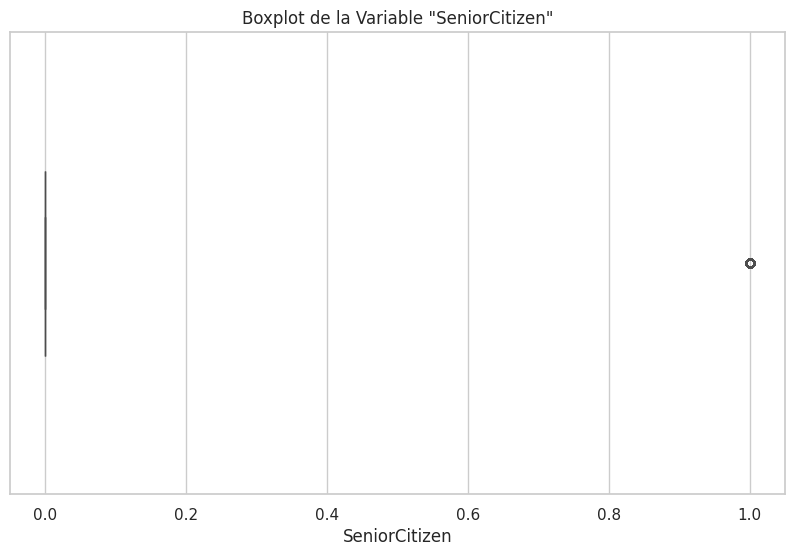

In [ ]:
# CREACIÓN BOXPLOT A OBJETO DE BUSCAR OUTLIERS EN LA VARIABLE "SENIORCITIZEN".

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.boxplot(x=df_telco_customer['SeniorCitizen'], color='cyan', width=0.4)
plt.xlabel('SeniorCitizen')
plt.title('Boxplot de la Variable "SeniorCitizen"')
plt.show()

In [ ]:
#CÁLCULO DE OUTLIERS EN LA VARIABLE "TENURE"

# Cálculo de los cuartiles
Q1 = df_telco_customer['tenure'].quantile(0.25)
Q3 = df_telco_customer['tenure'].quantile(0.75)

# Cálculo del rango intercuartílico (IQR)
IQR = Q3 - Q1

# Cálculo de los límites inferior y superior para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtro para los valores que están fuera de los límites calculados.
outliers_hr = df_telco_customer[(df_telco_customer['tenure'] < limite_inferior) | (df_telco_customer['tenure'] > limite_superior)]

# Impresión de las estadísticas descriptivas de la columna 'heartRate', incluyendo los outliers
print(f'El limite inferior de la variable es de: {limite_inferior}')
print(f'El limite superior de la variable es de: {limite_superior}')
print('\nValores atípicos (outliers) en la columna "tenure":')
print(outliers_hr['tenure'])

El limite inferior de la variable es de: -60.0
El limite superior de la variable es de: 124.0

Valores atípicos (outliers) en la columna "tenure":
Series([], Name: tenure, dtype: int64)


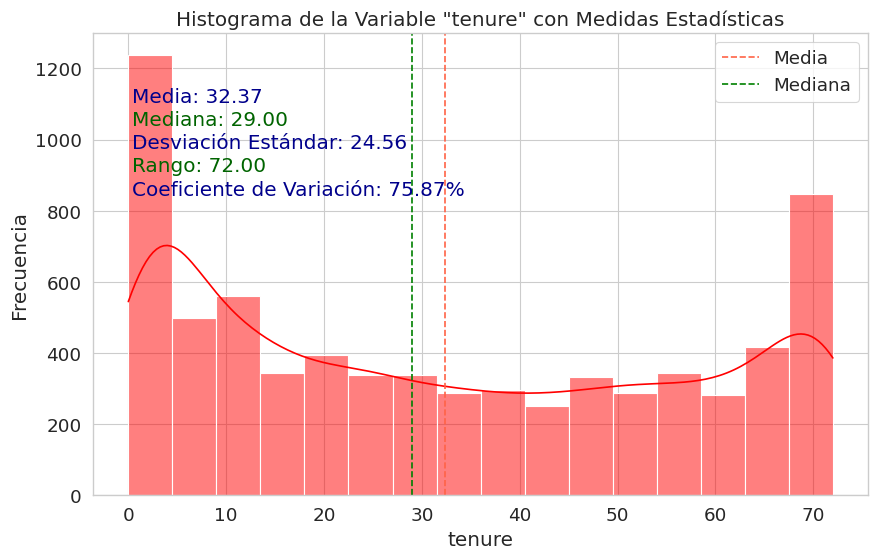

In [ ]:
#CREACIÓN DE HISTOGRAMA DE LA VARIABLE "TENURE" CON MEDIDAS ESTADÍSTICAS.

#Cálculo de las medidas estadísticas de la columna "SENIORCITIZEN" con funciones de Pandas.
media = df_telco_customer['tenure'].mean()
mediana = df_telco_customer['tenure'].median()
desviacion_estandar = df_telco_customer['tenure'].std()
rango = df_telco_customer['tenure'].max() - df_telco_customer['tenure'].min()
coeficiente_variacion = (desviacion_estandar / media) * 100

plt.figure(figsize=(10, 6))
sns.set_context('paper', font_scale=1.5)
sns.histplot(data=df_telco_customer, x='tenure', color='r', kde=True)
plt.axvline(media, color='tomato', ls='--', label='Media')
plt.axvline(mediana, color='green', ls='--', label='Mediana')

#Impresión de las medidas estadísticas dentro del gráfico
plt.text(0.05, 0.85, f'Media: {media:.2f}', transform=plt.gca().transAxes, color='#00008b')
plt.text(0.05, 0.8, f'Mediana: {mediana:.2f}', transform=plt.gca().transAxes, color='#006400')
plt.text(0.05, 0.75, f'Desviación Estándar: {desviacion_estandar:.2f}', transform=plt.gca().transAxes, color='#00008b')
plt.text(0.05, 0.7, f'Rango: {rango:.2f}', transform=plt.gca().transAxes, color='#006400')
plt.text(0.05, 0.65, f'Coeficiente de Variación: {coeficiente_variacion:.2f}%', transform=plt.gca().transAxes, color='#00008b')

plt.xlabel('tenure')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Variable "tenure" con Medidas Estadísticas')
plt.legend()
plt.show()

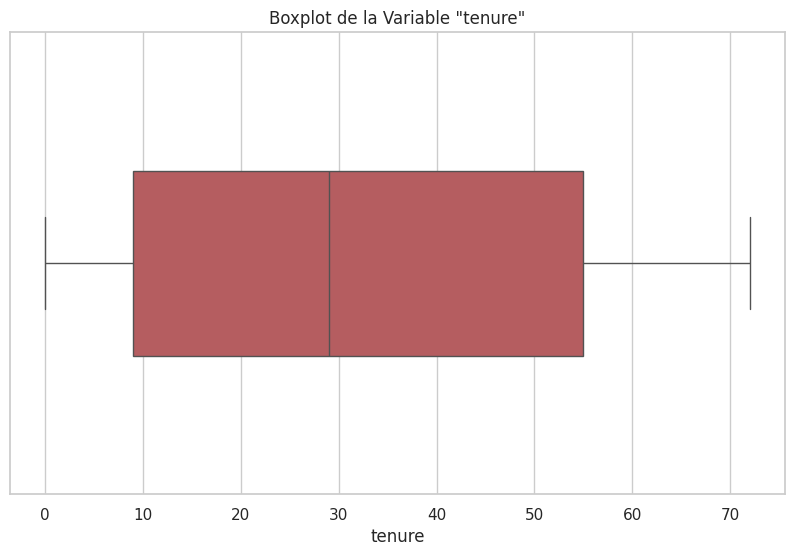

In [ ]:
# CREACIÓN BOXPLOT A OBJETO DE BUSCAR OUTLIERS EN LA VARIABLE "TENURE".

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.boxplot(x=df_telco_customer['tenure'], color='r', width=0.4)
plt.xlabel('tenure')
plt.title('Boxplot de la Variable "tenure"')
plt.show()

In [ ]:
#CÁLCULO DE OUTLIERS EN LA VARIABLE "MONTHLYCHARGES"

#Cálculo de los cuartiles
Q1 = df_telco_customer['MonthlyCharges'].quantile(0.25)
Q3 = df_telco_customer['MonthlyCharges'].quantile(0.75)

#Cálculo del rango intercuartílico (IQR)
IQR = Q3 - Q1

#Cálculo de los límites inferior y superior para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

#Filtro para los valores que están fuera de los límites calculados.
outliers_hr = df_telco_customer[(df_telco_customer['MonthlyCharges'] < limite_inferior) | (df_telco_customer['MonthlyCharges'] > limite_superior)]

# Impresión de las estadísticas descriptivas de la columna 'heartRate', incluyendo los outliers
print(f'El limite inferior de la variable es de: {limite_inferior}')
print(f'El limite superior de la variable es de: {limite_superior}')
print('\nValores atípicos (outliers) en la columna "MonthlyCharges":')
print(outliers_hr['MonthlyCharges'])

El limite inferior de la variable es de: -46.02499999999999
El limite superior de la variable es de: 171.375

Valores atípicos (outliers) en la columna "MonthlyCharges":
Series([], Name: MonthlyCharges, dtype: float64)


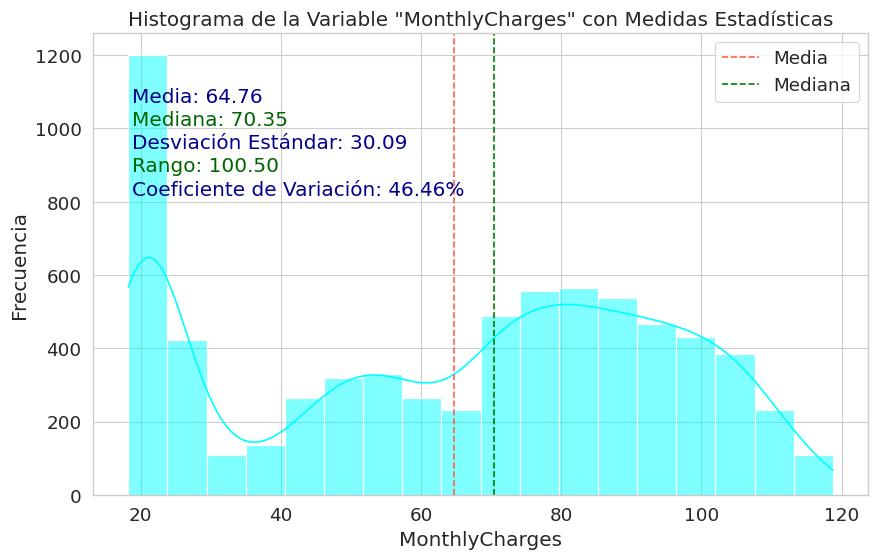

In [ ]:
#CREACIÓN DE HISTOGRAMA DE LA VARIABLE "TENURE" CON MEDIDAS ESTADÍSTICAS.

#Cálculo de las medidas estadísticas de la columna "MONTHLYCHARGES" con funciones de Pandas.
media = df_telco_customer['MonthlyCharges'].mean()
mediana = df_telco_customer['MonthlyCharges'].median()
desviacion_estandar = df_telco_customer['MonthlyCharges'].std()
rango = df_telco_customer['MonthlyCharges'].max() - df_telco_customer['MonthlyCharges'].min()
coeficiente_variacion = (desviacion_estandar / media) * 100

plt.figure(figsize=(10, 6))
sns.set_context('paper', font_scale=1.5)
sns.histplot(data=df_telco_customer, x='MonthlyCharges', color='cyan', kde=True)
plt.axvline(media, color='tomato', ls='--', label='Media')
plt.axvline(mediana, color='green', ls='--', label='Mediana')

#Impresión de las medidas estadísticas dentro del gráfico
plt.text(0.05, 0.85, f'Media: {media:.2f}', transform=plt.gca().transAxes, color='#00008b')
plt.text(0.05, 0.8, f'Mediana: {mediana:.2f}', transform=plt.gca().transAxes, color='#006400')
plt.text(0.05, 0.75, f'Desviación Estándar: {desviacion_estandar:.2f}', transform=plt.gca().transAxes, color='#00008b')
plt.text(0.05, 0.7, f'Rango: {rango:.2f}', transform=plt.gca().transAxes, color='#006400')
plt.text(0.05, 0.65, f'Coeficiente de Variación: {coeficiente_variacion:.2f}%', transform=plt.gca().transAxes, color='#00008b')

plt.xlabel('MonthlyCharges')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Variable "MonthlyCharges" con Medidas Estadísticas')
plt.legend()
plt.show()

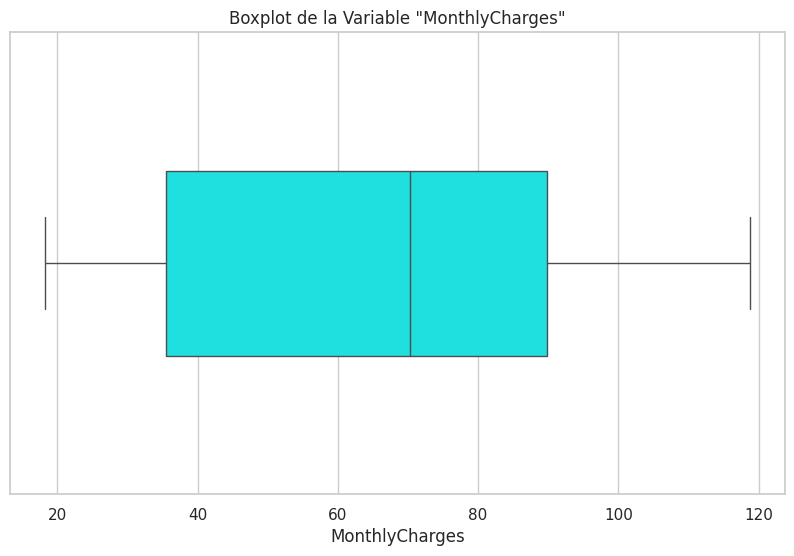

In [ ]:
# CREACIÓN BOXPLOT A OBJETO DE BUSCAR OUTLIERS EN LA VARIABLE "MONTHLYCHARGES".

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.boxplot(x=df_telco_customer['MonthlyCharges'], color='cyan', width=0.4)
plt.xlabel('MonthlyCharges')
plt.title('Boxplot de la Variable "MonthlyCharges"')
plt.show()

In [ ]:
#CÁLCULO DE OUTLIERS EN LA VARIABLE "TOTALCHARGES".

# Cálculo de los cuartiles
Q1 = df_telco_customer['TotalCharges'].quantile(0.25)
Q3 = df_telco_customer['TotalCharges'].quantile(0.75)

# Cálculo del rango intercuartílico (IQR)
IQR = Q3 - Q1

# Cálculo de los límites inferior y superior para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtro para los valores que están fuera de los límites calculados.
outliers_hr = df_telco_customer[(df_telco_customer['TotalCharges'] < limite_inferior) | (df_telco_customer['TotalCharges'] > limite_superior)]

# Impresión de las estadísticas descriptivas de la columna 'heartRate', incluyendo los outliers
print(f'El limite inferior de la variable es de: {limite_inferior}')
print(f'El limite superior de la variable es de: {limite_superior}')
print('\nValores atípicos (outliers) en la columna "TotalCharges":')
print(outliers_hr['TotalCharges'])

El limite inferior de la variable es de: -4683.525
El limite superior de la variable es de: 8868.675

Valores atípicos (outliers) en la columna "TotalCharges":
Series([], Name: TotalCharges, dtype: float64)


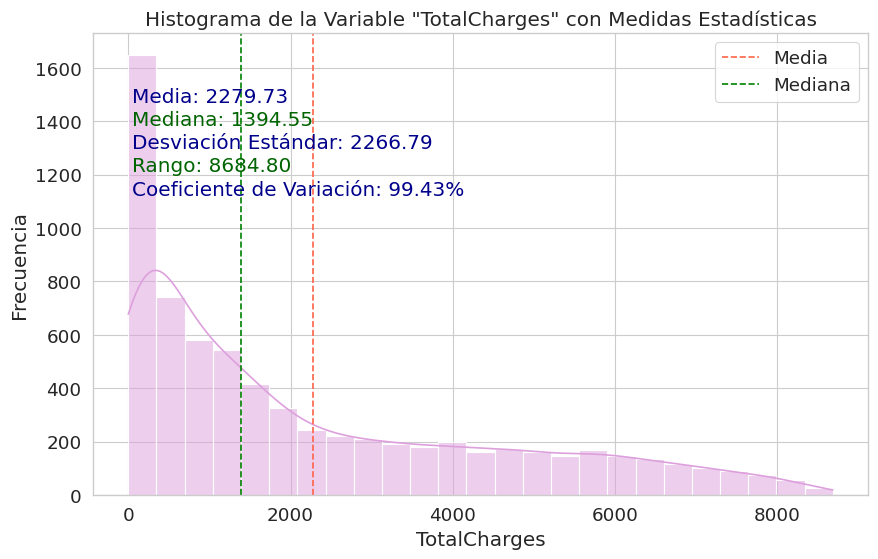

In [ ]:
#CREACIÓN DE HISTOGRAMA DE LA VARIABLE "TOTALCHARGES" CON MEDIDAS ESTADÍSTICAS.

#Cálculo de las medidas estadísticas de la columna "MONTHLYCHARGES" con funciones de Pandas.
media = df_telco_customer['TotalCharges'].mean()
mediana = df_telco_customer['TotalCharges'].median()
desviacion_estandar = df_telco_customer['TotalCharges'].std()
rango = df_telco_customer['TotalCharges'].max() - df_telco_customer['TotalCharges'].min()
coeficiente_variacion = (desviacion_estandar / media) * 100

plt.figure(figsize=(10, 6))
sns.set_context('paper', font_scale=1.5)
sns.histplot(data=df_telco_customer, x='TotalCharges', color='plum', kde=True)
plt.axvline(media, color='tomato', ls='--', label='Media')
plt.axvline(mediana, color='green', ls='--', label='Mediana')

#Impresión de las medidas estadísticas dentro del gráfico
plt.text(0.05, 0.85, f'Media: {media:.2f}', transform=plt.gca().transAxes, color='#00008b')
plt.text(0.05, 0.8, f'Mediana: {mediana:.2f}', transform=plt.gca().transAxes, color='#006400')
plt.text(0.05, 0.75, f'Desviación Estándar: {desviacion_estandar:.2f}', transform=plt.gca().transAxes, color='#00008b')
plt.text(0.05, 0.7, f'Rango: {rango:.2f}', transform=plt.gca().transAxes, color='#006400')
plt.text(0.05, 0.65, f'Coeficiente de Variación: {coeficiente_variacion:.2f}%', transform=plt.gca().transAxes, color='#00008b')

plt.xlabel('TotalCharges')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Variable "TotalCharges" con Medidas Estadísticas')
plt.legend()
plt.show()

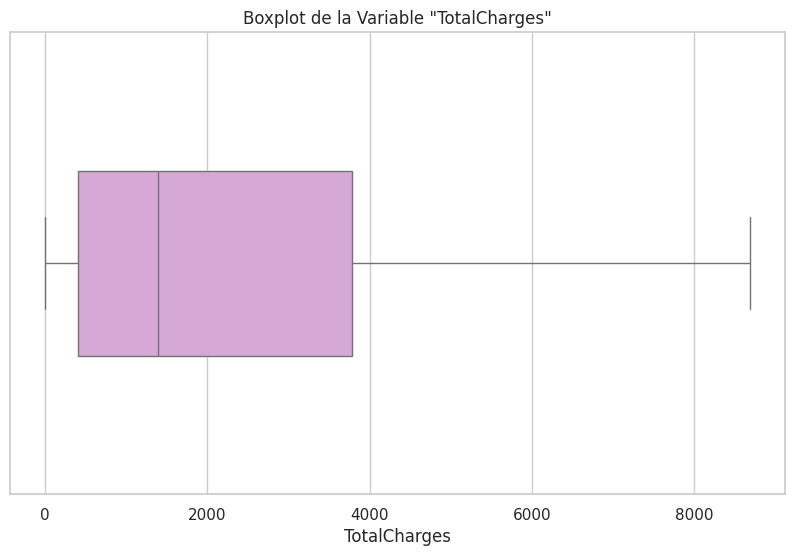

In [ ]:
# CREACIÓN BOXPLOT A OBJETO DE BUSCAR OUTLIERS EN LA VARIABLE "TOTALCHARGES".

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.boxplot(x=df_telco_customer['TotalCharges'], color='plum', width=0.4)
plt.xlabel('TotalCharges')
plt.title('Boxplot de la Variable "TotalCharges"')
plt.show()

# **PREGUNTA 3: DIVIDIR LOS DATOS EN CONJUNTO DE ENTRENAMIENTO Y PRUEBA**.

In [ ]:
#IMPORTACIÓN DE LIBRERÍAS

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB


In [ ]:
#ELIMINACIÓN DE LA VARIABLE "CUSTOMERID".

df_telco_customer.drop('customerID', axis=1, inplace=True)
df_telco_customer.head

<bound method NDFrame.head of       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7043 rows x 20 columns]>

In [ ]:
#REVISIÓN DEL DF RESULTANTE.

df_telco_customer

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
#TRANSFORMACIÓN DE LAS VARIABLES CATEGÓRICAS (CODIFICACIÒN).

from sklearn.preprocessing import LabelEncoder
categ
label_encoder = LabelEncoder()
for columna in categorical:
    df_telco_customer[columna] = label_encoder.fit_transform(df_telco_customer[columna])

categorical_variables

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
df_telco_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


# **PREGUNTA 4: ENTRENAR A LO MENOS TRES ALGORITMOS Y OPTIMIZAR SUS HIPERPARÁMETROS**.

In [ ]:
#ENTRENAMIENTO CON ALGORITMO DE REGRESIÓN LOGÍSTICA Y OPTIMIZACIÓN DE SUS HIPERPARÁMETROS.


#Inicializar el modelo de Regresión Logística.
logistic_regression = LogisticRegression(random_state=590)

#SMOTE para el balanceo de clases en el conjunto de entrenamiento.
smote = SMOTE(random_state=590)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#Entrenamiento del modelo.
logistic_regression.fit(X_train, y_train)

#Predicciones sobre el conjunto de prueba.
y_pred = logistic_regression.predict(X_test)

#Definición de los parámetros a optimizar.
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],                    # Parámetro de regularización.
    'penalty': ['l1', 'l2'],                                # Tipo de regularización (L1 o L2).
    'solver': ['liblinear', 'saga']                         # Algoritmo de optimización.
}

#Inicializar GridSearchCV.
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=590),
                           param_grid=params,
                           cv=5,                    # Número de folds para validación cruzada
                           scoring='accuracy',      # Métrica de evaluación
                           verbose=1,               # Mostrar mensajes durante el entrenamiento
                           n_jobs=-1)               # Número de procesos en paralelo (utiliza todos los disponibles)

#Ajustar GridSearchCV con los datos de entrenamiento con SMOTE.
grid_search.fit(X_train_smote, y_train_smote)

#Obtener los mejores parámetros y el mejor score.
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Mejores parámetros encontrados:", best_params)
print("Mejor accuracy encontrado:", best_score)

#Obtener el mejor modelo entrenado.
best_model = grid_search.best_estimator_

#Predicciones sobre el conjunto de prueba.
y_pred = best_model.predict(X_test)

#Evaluación del modelo.
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy en conjunto de prueba con el mejor modelo:", accuracy)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros encontrados: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor accuracy encontrado: 0.7842249657064471

Accuracy en conjunto de prueba con el mejor modelo: 0.751538097491718
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1529
           1       0.54      0.76      0.63       584

    accuracy                           0.75      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.75      0.76      2113



In [ ]:
#ENTRENAMIENTO DEL MODELO CON ALGORITMO DE KNN, OPTIMIZACIÓN DE SUS HIPERPARÁMETROS Y GRAFICACIÓN.

# Definición modelo KNN.
knn = KNeighborsClassifier()

#Parámetros a ajustar.
parametros_knn = {
    'n_neighbors': [3, 5, 6, 7, 8],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

#Ajuste de parámetros usando GridSearchCV con validación cruzada.
grid_search_knn = GridSearchCV(knn, parametros_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

#Obtención de los mejores parámetros y puntaje.
mejores_parametros_knn = grid_search_knn.best_params_
mejor_puntaje_knn = grid_search_knn.best_score_

#Modelo final con los mejores parámetros encontrados.
modelo_knn = grid_search_knn.best_estimator_

#Aplicar SMOTE al conjunto de entrenamiento.
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#Entrenar el modelo con los datos balanceados usando validación cruzada en el conjunto de entrenamiento.
scores = cross_val_score(modelo_knn, X_train_smote, y_train_smote, cv=5)
media_puntajes = scores.mean()

#Entrenar el modelo final con los datos balanceados.
modelo_knn.fit(X_train_smote, y_train_smote)

#Evaluación del modelo en el conjunto de prueba.
y_pred_knn = modelo_knn.predict(X_test)
precision_knn = accuracy_score(y_test, y_pred_knn)

print('\nMejores hiperparámetros para KNN:', mejores_parametros_knn)
print('\nPuntaje del modelo KNN con los mejores hiperparámetros (en validación cruzada):', mejor_puntaje_knn)
print('\nPrecisión media del modelo KNN en el conjunto de entrenamiento (validación cruzada):', media_puntajes)
print('\nPrecisión del modelo KNN en el conjunto de prueba:', precision_knn)





Mejores hiperparámetros para KNN: {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'uniform'}

Puntaje del modelo KNN con los mejores hiperparámetros (en validación cruzada): 0.7864097363083163

Precisión media del modelo KNN en el conjunto de entrenamiento (validación cruzada): 0.8076817558299041

Precisión del modelo KNN en el conjunto de prueba: 0.7307146237576905


Mejores parámetros encontrados: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Mejor accuracy encontrado: 0.9400000000000001

Predicción para el nuevo dato: [0]
Distancias a los vecinos más cercanos: [[0.16305906 0.21208018 0.22482978 0.24071583 0.32678091 0.33962383
  0.35206038 0.35657409 0.36503654]]
Índices de vecinos más cercanos: [[166 158 196 120  79   5  15 128   7]]


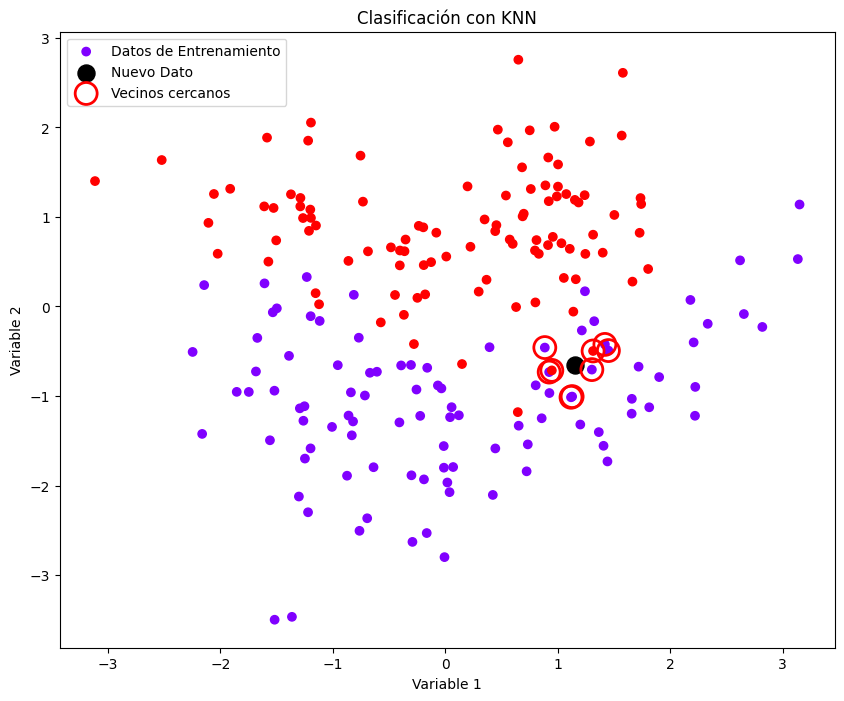

In [ ]:
#OBTENCIÓN Y GRAFICACIÓN DE LOS MEJORES PARÁMETROS DEL MODELO KNN.

# Generar un conjunto de datos de juguete para clasificación
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, random_state=4321)

# Definir el clasificador KNN
knn = KNeighborsClassifier()

# Definir los parámetros a ajustar mediante GridSearchCV
parametros_knn = {
    'n_neighbors': [3, 5, 7, 9],    # Número de vecinos
    'weights': ['uniform', 'distance'],  # Peso de los vecinos (uniforme o distancia)
    'metric': ['euclidean', 'manhattan']  # Métrica de distancia
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=parametros_knn, cv=5, scoring='accuracy')

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search.fit(X, y)

# Obtener el mejor modelo y los mejores parámetros encontrados
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Imprimir los mejores parámetros y el mejor score
print("Mejores parámetros encontrados:", best_params)
print("Mejor accuracy encontrado:", best_score)

# Generar un nuevo dato de prueba
new_data = np.array([[1.15, -0.65]])

# Realizar predicción en el nuevo dato de prueba con el mejor modelo encontrado
prediction = best_model.predict(new_data)

# Obtener los k vecinos más cercanos al nuevo dato de prueba, y las distancias respectivas
distances, indices = best_model.kneighbors(new_data)

# Imprimir la predicción y los k vecinos más cercanos
print("\nPredicción para el nuevo dato:", prediction)
print("Distancias a los vecinos más cercanos:", distances)
print("Índices de vecinos más cercanos:", indices)

# Plotear los datos de entrenamiento con los vecinos más cercanos resaltados
plt.figure(figsize=(10, 8))

# Plotear los puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', label='Datos de Entrenamiento')

# Plotear el nuevo dato de prueba
plt.scatter(new_data[:, 0], new_data[:, 1], color='black', marker='o', s=150, label='Nuevo Dato')

# Plotear un círculo alrededor de los k vecinos más cercanos
plt.scatter(X[indices, 0], X[indices, 1], facecolors='none', edgecolors='red', linewidths=2, marker='o', s=250, label='Vecinos cercanos')

plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Clasificación con KNN')
plt.legend()
plt.show()


In [ ]:
#ENTRENAMIENTO DEL MODELO CON ALGORITMO DEL ÁRBOL DE DECISIONES Y OPTIMIZACIÓN DE SUS HIPERPARÁMETROS.

# Modelo de Árbol de Decisión
arbol_decision = DecisionTreeClassifier()

# Parámetros para ajustar
parametros_arbol = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 6, 7, 8],
    'min_samples_leaf': [5, 10, 15, 20]
}

# Ajuste de parámetros usando GridSearchCV
grid_search_arbol = GridSearchCV(arbol_decision, parametros_arbol, cv=5)
grid_search_arbol.fit(X_train, y_train)

# Mejores parámetros y puntaje
mejores_parametros_arbol = grid_search_arbol.best_params_
mejor_puntaje_arbol = grid_search_arbol.best_score_

# Modelo final con los mejores parámetros encontrados
modelo_arbol = grid_search_arbol.best_estimator_

# Evaluación del modelo en el conjunto de prueba
y_pred_arbol = modelo_arbol.predict(X_test)
precision_arbol = accuracy_score(y_test, y_pred_arbol)

# Impresión de resultados
print('\nMejores hiperparámetros para Árbol de Decisión:', mejores_parametros_arbol)
print('\nPuntaje del modelo Árbol de Decisión con los mejores hiperparámetros:', mejor_puntaje_arbol)
print('\nPrecisión del modelo Árbol de Decisión en el conjunto de prueba:', precision_arbol)



Mejores hiperparámetros para Árbol de Decisión: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 20}

Puntaje del modelo Árbol de Decisión con los mejores hiperparámetros: 0.7955375253549695

Precisión del modelo Árbol de Decisión en el conjunto de prueba: 0.779460482725982


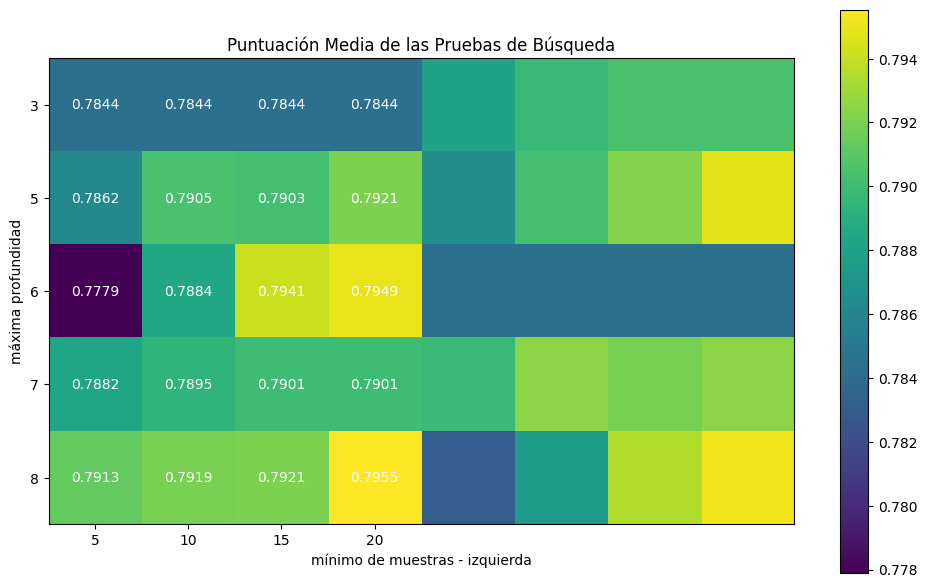

In [ ]:
#GRAFICACIÓN RESULTADOS ALGORITMO ÁRBOL DE DECISIONES.

# Datos para el gráfico
max_depths = [3, 5, 6, 7, 8]
min_samples_leaf = [5, 10, 15, 20]

#Cálculo del número de columnas según la matriz.
num_cols = len(grid_search_arbol.cv_results_['mean_test_score']) // len(max_depths)
scores = grid_search_arbol.cv_results_['mean_test_score'].reshape(len(max_depths), num_cols)

#Gráfico.
plt.figure(figsize=(10, 6))
plt.imshow(scores, interpolation='nearest', cmap='viridis')
plt.title('Puntuación Media de las Pruebas de Búsqueda')
plt.xlabel('mínimo de muestras - izquierda')
plt.ylabel('máxima profundidad')
plt.colorbar()

#Marcado de los valores de puntaje en el gráfico.
for i in range(len(max_depths)):
    for j in range(len(min_samples_leaf)):
        plt.text(j, i, f'{scores[i, j]:.4f}', horizontalalignment='center', verticalalignment='center', color='white')

plt.xticks(ticks=range(len(min_samples_leaf)), labels=min_samples_leaf)
plt.yticks(ticks=range(len(max_depths)), labels=max_depths)
plt.tight_layout()
plt.show()


In [ ]:
#ENTRENAMIENTO DEL MODELO CON ALGORITMO NAIVE BAYES Y OPTIMIZACIÓN DE SUS HIPERPARÁMETROS.

#Datos seleccionados.
df_telco_customer = pd.DataFrame({
    'SeniorCitizen': [0, 1, 0, 1, 0],
    'tenure': [10, 20, 30, 40, 50],
    'MonthlyCharges': [50, 60, 70, 80, 90],
    'TotalCharges': [500, 1000, 1500, 2000, 2500],
    'Churn': [0, 1, 0, 1, 0]
})

#Selección variables numéricas.
numerical_variables = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

#Separación variable objetivo de las variables predictoras.
X = df_telco_customer.drop('Churn', axis=1)
y = df_telco_customer['Churn']

#División de los datos (70%/30%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=590)

#Normalización.
scaler = StandardScaler()
X_train[numerical_variables] = scaler.fit_transform(X_train[numerical_variables])
X_test[numerical_variables] = scaler.transform(X_test[numerical_variables])

#Inicialización de Naive Bayes.
naive_bayes = GaussianNB()

#Entrenamiento.
naive_bayes.fit(X_train, y_train)

#Predicciones del conjunto de prueba.
y_pred = naive_bayes.predict(X_test)

#Evaluación del modelo.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy en conjunto de prueba:", accuracy)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Accuracy en conjunto de prueba: 0.5
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


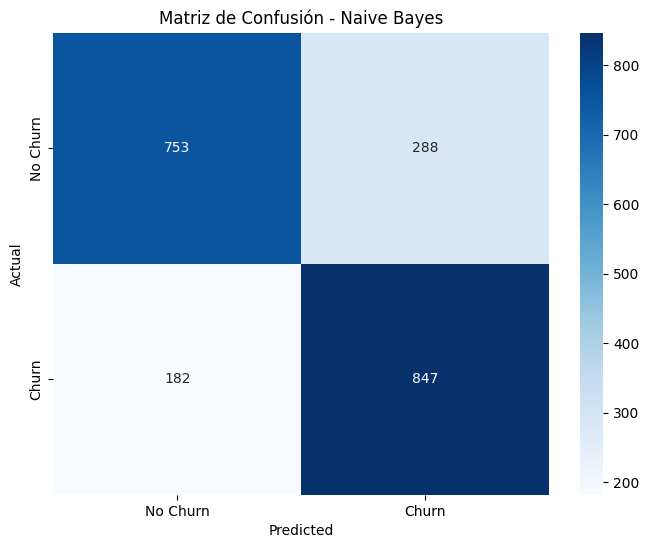

In [ ]:
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Define las etiquetas para los ejes x e y de la matriz de confusión
class_names = ['No Churn', 'Churn']

# Configura el gráfico de la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Naive Bayes')
plt.show()

# **PREGUNTA 5: EVALUAR EL RENDIMIENTO DE LOS MODELOS UTILIZANDO MÉTRICAS DE EVALUACIÓN PERTINENTES, COMO PRECISIÓN, SENSIBILIDAD, VALOR F1, ENTRE OTRAS.**.

Mejores parámetros encontrados: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Mejor accuracy encontrado: 0.9400000000000001

Predicción para el nuevo dato: [0]
Distancias a los vecinos más cercanos: [[0.16305906 0.21208018 0.22482978 0.24071583 0.32678091 0.33962383
  0.35206038 0.35657409 0.36503654]]
Índices de vecinos más cercanos: [[166 158 196 120  79   5  15 128   7]]

Accuracy en conjunto de prueba: 0.955

Matriz de Confusión:
[[97  2]
 [ 7 94]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        99
           1       0.98      0.93      0.95       101

    accuracy                           0.95       200
   macro avg       0.96      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200



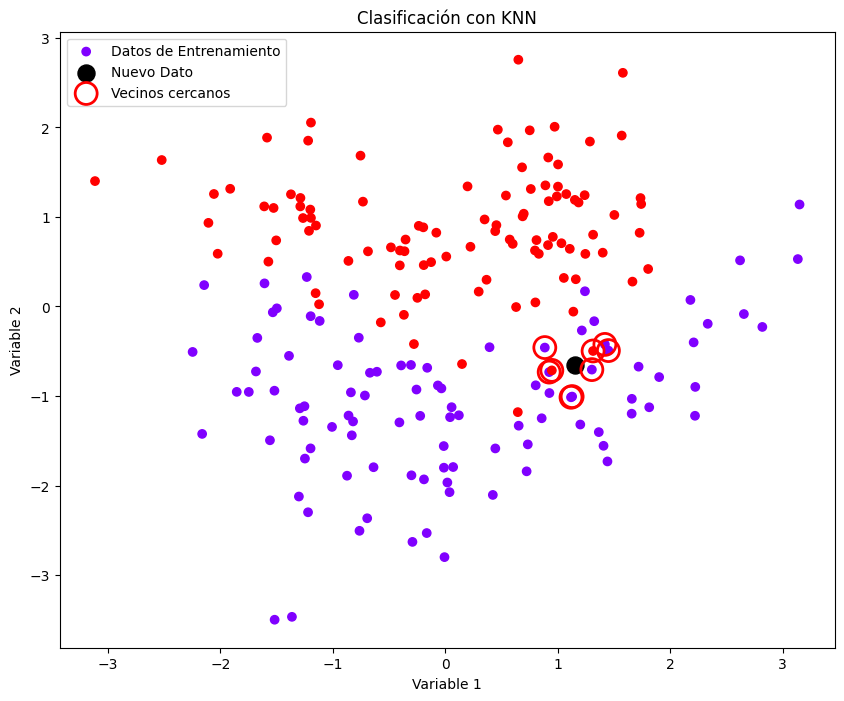

In [ ]:
#EVALUACIÓN DE RENDIMIENTO, MÉTRICAS DE EVALUACIÓN Y GRAFICACIÓN DEL MODELO KNN.

# Generar un conjunto de datos de juguete para clasificación
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, random_state=4321)

# Definir el clasificador KNN
knn = KNeighborsClassifier()

# Definir los parámetros a ajustar mediante GridSearchCV
parametros_knn = {
    'n_neighbors': [3, 5, 7, 9],    # Número de vecinos
    'weights': ['uniform', 'distance'],  # Peso de los vecinos (uniforme o distancia)
    'metric': ['euclidean', 'manhattan']  # Métrica de distancia
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=parametros_knn, cv=5, scoring='accuracy')

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search.fit(X, y)

# Obtener el mejor modelo y los mejores parámetros encontrados
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Imprimir los mejores parámetros y el mejor score
print("Mejores parámetros encontrados:", best_params)
print("Mejor accuracy encontrado:", best_score)

# Generar un nuevo dato de prueba
new_data = np.array([[1.15, -0.65]])

# Realizar predicción en el nuevo dato de prueba con el mejor modelo encontrado
prediction = best_model.predict(new_data)

# Obtener los k vecinos más cercanos al nuevo dato de prueba, y las distancias respectivas
distances, indices = best_model.kneighbors(new_data)

# Imprimir la predicción y los k vecinos más cercanos
print("\nPredicción para el nuevo dato:", prediction)
print("Distancias a los vecinos más cercanos:", distances)
print("Índices de vecinos más cercanos:", indices)

# Calcular métricas de evaluación en el conjunto de prueba
y_pred = best_model.predict(X)
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred)

# Imprimir métricas de evaluación
print("\nAccuracy en conjunto de prueba:", accuracy)
print("\nMatriz de Confusión:")
print(conf_matrix)
print("\nReporte de Clasificación:")
print(class_report)

# Plotear los datos de entrenamiento con los vecinos más cercanos resaltados
plt.figure(figsize=(10, 8))

# Plotear los puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', label='Datos de Entrenamiento')

# Plotear el nuevo dato de prueba
plt.scatter(new_data[:, 0], new_data[:, 1], color='black', marker='o', s=150, label='Nuevo Dato')

# Plotear un círculo alrededor de los k vecinos más cercanos
plt.scatter(X[indices, 0], X[indices, 1], facecolors='none', edgecolors='red', linewidths=2, marker='o', s=250, label='Vecinos cercanos')

plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Clasificación con KNN')
plt.legend()
plt.show()


In [ ]:
#MATRIZ DE CONFUSION Y REPORTE DE CLASIFICACIÓN DEL ALGORITMO KNN.

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_knn)
print("\nMatriz de Confusión:")
print(cm)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_knn))

# Impresión de resultados
print("\nÁrea bajo la Curva (AUC):", auc_score)

# Calcular la media y la desviación estándar de los scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Impresión de los resultados
print("\nMedia de los scores:", mean_score)
print("Desviación estándar de los scores:", std_score)




Matriz de Confusión:
[[1142  387]
 [ 182  402]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1529
           1       0.51      0.69      0.59       584

    accuracy                           0.73      2113
   macro avg       0.69      0.72      0.69      2113
weighted avg       0.76      0.73      0.74      2113


Área bajo la Curva (AUC): 1.0

Media de los scores: 0.8076817558299041
Desviación estándar de los scores: 0.029575599775315736


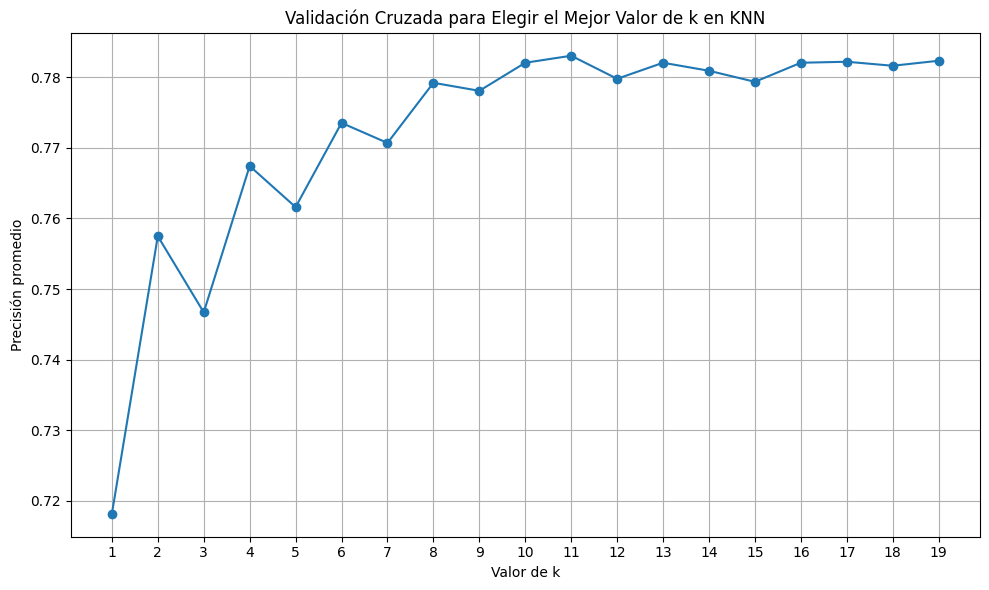

In [ ]:
#VALIDACIÓN CRUZADA Y GRAFICACIÓN DEL MEJOR VALOR DE K EN EL MODELO KNN.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#DataBase
data = df_telco_customer  # Remove the parentheses here
X = df_telco_customer.drop('Churn', axis=1)
y = df_telco_customer['Churn']

# Lista para almacenar las precisiones promedio
mean_scores = []

# Valores de k a probar
k_values = range(1, 20)

# Realizar validación cruzada para cada valor de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)  # Validación cruzada con 5 folds
    mean_scores.append(np.mean(scores))

# Ploteamos la precisión promedio en función de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Precisión promedio')
plt.title('Validación Cruzada para Elegir el Mejor Valor de k en KNN')
plt.grid(True)
plt.xticks(k_values)
plt.tight_layout()
plt.show()


Área bajo la Curva (AUC): 0.7854868658000125

Área bajo la Curva (AUC): 0.7854868658000125


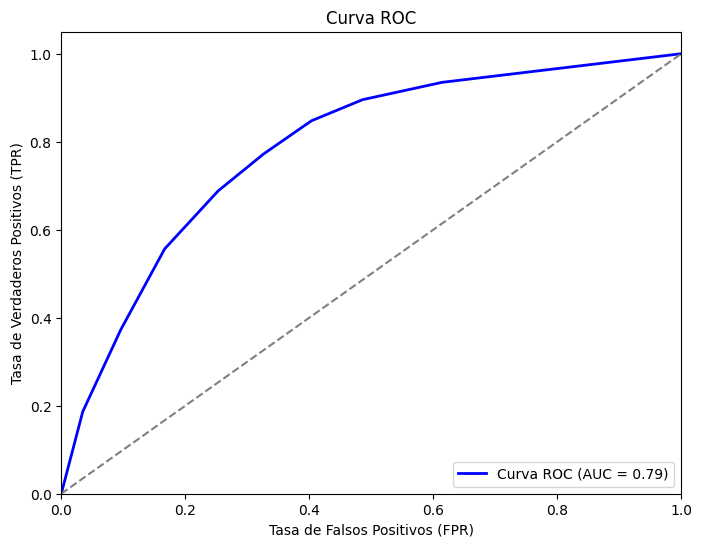

In [ ]:
#CÁLCULO DE LA CURVA ROC Y DEL AUC CON GRAFICACIÓN DEL MODELO KNN.

#Obtención curva ROC y AUC
y_probs_knn = modelo_knn.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_probs_knn)
auc_score = roc_auc_score(y_test, y_probs_knn)

print("\nÁrea bajo la Curva (AUC):", auc_score)
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#Calcular curva ROC y el AUC.
y_probs_knn = modelo_knn.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_probs_knn)
auc_score = roc_auc_score(y_test, y_probs_knn)

#Impresión AUC.
print("\nÁrea bajo la Curva (AUC):", auc_score)

#Grafico curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


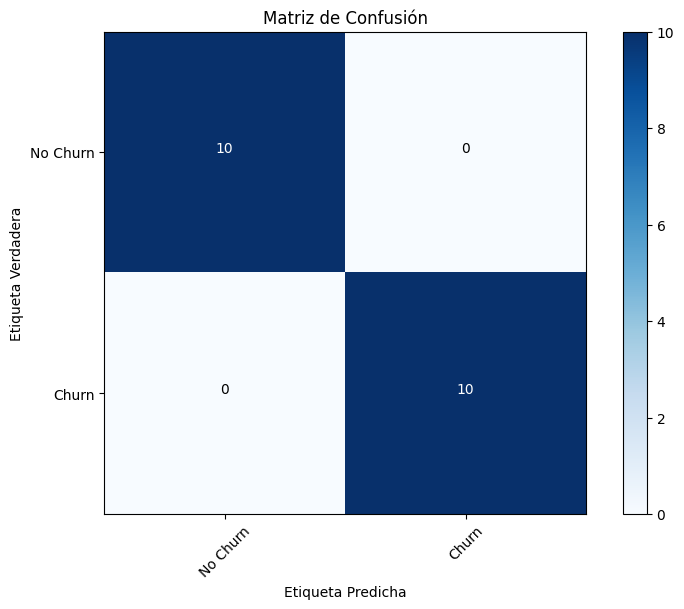

Mejor valor de k encontrado: 11
Precisión promedio con el mejor valor de k: 0.7830479990644558


In [ ]:
#CÁLCULO DE LA MATRIZ DE CONFUSIÓN Y GRAFICACIÓN.

# Importa las librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

# Calcular la matriz de confusión
# Asegúrate de que 'y_test' y 'y_pred' provengan de la misma división de datos
confusion_matrix = confusion_matrix(y_test, y_pred_knn) # 'y_pred' was changed to 'y_pred_knn'

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()

# Asegúrate de que 'classes' se defina correctamente según tu conjunto de datos
classes = ['No Churn', 'Churn']  # Reemplaza con las clases reales si es necesario
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = confusion_matrix.max() / 2.
for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

# Mostrar el mejor valor de k y la precisión promedio
print(f'Mejor valor de k encontrado: {k_values[np.argmax(mean_scores)]}')
print(f'Precisión promedio con el mejor valor de k: {np.max(mean_scores)}')


Matriz de Confusión:
[[1309  220]
 [ 246  338]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1529
           1       0.61      0.58      0.59       584

    accuracy                           0.78      2113
   macro avg       0.72      0.72      0.72      2113
weighted avg       0.78      0.78      0.78      2113


Área bajo la Curva (AUC): 0.8123577725615273


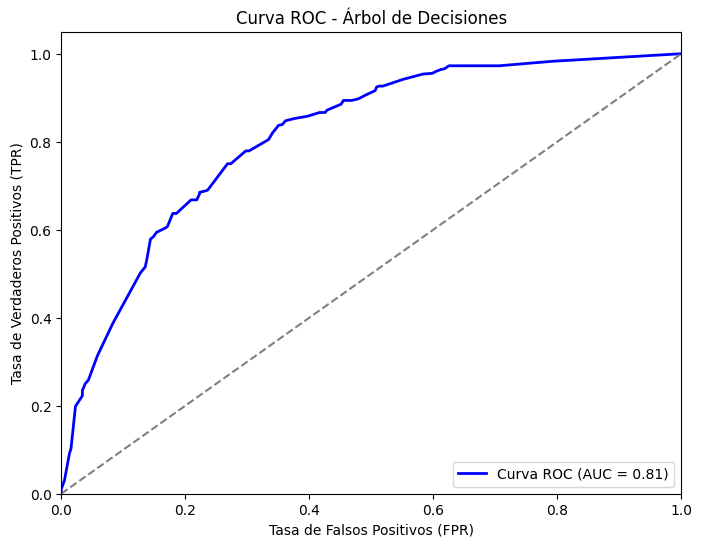

In [ ]:
#MÉTRICAS DE EVALUACIÓN DEL ALGORITMO DEL ÁRBOL DE DECISIONES

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Definición del modelo Árbol de Decisiones
arbol_decision = DecisionTreeClassifier()

# Parámetros para ajustar
parametros_arbol = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 6, 7, 8],
    'min_samples_leaf': [5, 10, 15, 20]
}

# Ajuste de parámetros usando GridSearchCV
grid_search_arbol = GridSearchCV(arbol_decision, parametros_arbol, cv=5)
grid_search_arbol.fit(X_train, y_train)

# Mejores parámetros y puntaje
mejores_parametros_arbol = grid_search_arbol.best_params_
mejor_puntaje_arbol = grid_search_arbol.best_score_

# Modelo final con los mejores parámetros encontrados
modelo_arbol = grid_search_arbol.best_estimator_

# Evaluación del modelo en el conjunto de prueba
y_pred_arbol = modelo_arbol.predict(X_test)
precision_arbol = accuracy_score(y_test, y_pred_arbol)

# Métricas adicionales
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred_arbol)
print("\nMatriz de Confusión:")
print(cm)

#Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_arbol))

#Curva ROC y AUC
y_probs_arbol = modelo_arbol.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_probs_arbol)
auc_score = roc_auc_score(y_test, y_probs_arbol)

print("\nÁrea bajo la Curva (AUC):", auc_score)

#Visualización de la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Árbol de Decisiones')
plt.legend(loc="lower right")
plt.show()



Matriz de Confusión:
[[10  0]
 [ 0 10]]


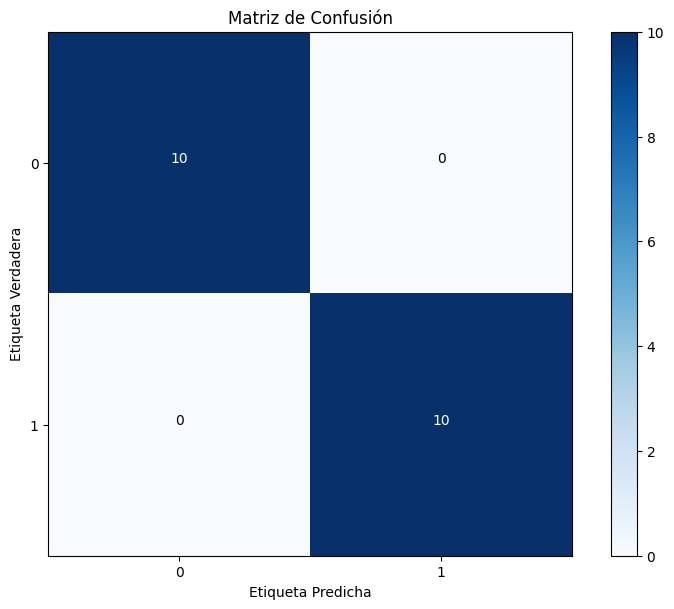


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
#MATRIZ DE CONFUSIÓN DEL ALGORITMO DE ÁRBOL DE DECISIONES.

# Definición del modelo Árbol de Decisiones
arbol_decision = DecisionTreeClassifier()

# Parámetros para ajustar
parametros_arbol = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 6, 7, 8],
    'min_samples_leaf': [5, 10, 15, 20]
}

# Ajuste de parámetros usando GridSearchCV
grid_search_arbol = GridSearchCV(arbol_decision, parametros_arbol, cv=5)
grid_search_arbol.fit(X_train, y_train)

# Mejores parámetros y puntaje
mejores_parametros_arbol = grid_search_arbol.best_params_
mejor_puntaje_arbol = grid_search_arbol.best_score_

# Modelo final con los mejores parámetros encontrados
modelo_arbol = grid_search_arbol.best_estimator_

# Evaluación del modelo en el conjunto de prueba
y_pred_arbol = modelo_arbol.predict(X_test)
precision_arbol = accuracy_score(y_test, y_pred_arbol)

# Métricas adicionales
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred_arbol)
print("\nMatriz de Confusión:")
print(cm)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))  # Etiquetas para los ejes
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))

# Añadir anotaciones
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')

plt.show()

#Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_arbol))



In [ ]:
#MÉTRICAS DE EVALUACIÓN PARE EL ALGORITMO DE NAIVE BAYES.

# Datos seleccionados
df_telco_customer = pd.DataFrame({
    'SeniorCitizen': [0, 1, 0, 1, 0],
    'tenure': [10, 20, 30, 40, 50],
    'MonthlyCharges': [50, 60, 70, 80, 90],
    'TotalCharges': [500, 1000, 1500, 2000, 2500],
    'Churn': [0, 1, 0, 1, 0]
})

# Selección variables numéricas
numerical_variables = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Separación variable objetivo de las variables predictoras
X = df_telco_customer.drop('Churn', axis=1)
y = df_telco_customer['Churn']

# División de los datos (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=590)

# Normalización
scaler = StandardScaler()
X_train[numerical_variables] = scaler.fit_transform(X_train[numerical_variables])
X_test[numerical_variables] = scaler.transform(X_test[numerical_variables])

# Inicialización de Naive Bayes
naive_bayes = GaussianNB()

# Entrenamiento
naive_bayes.fit(X_train, y_train)

# Predicciones del conjunto de prueba
y_pred = naive_bayes.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy en conjunto de prueba:", accuracy)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Accuracy en conjunto de prueba: 0.5

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Matriz de Confusión:
[[1 0]
 [1 0]]


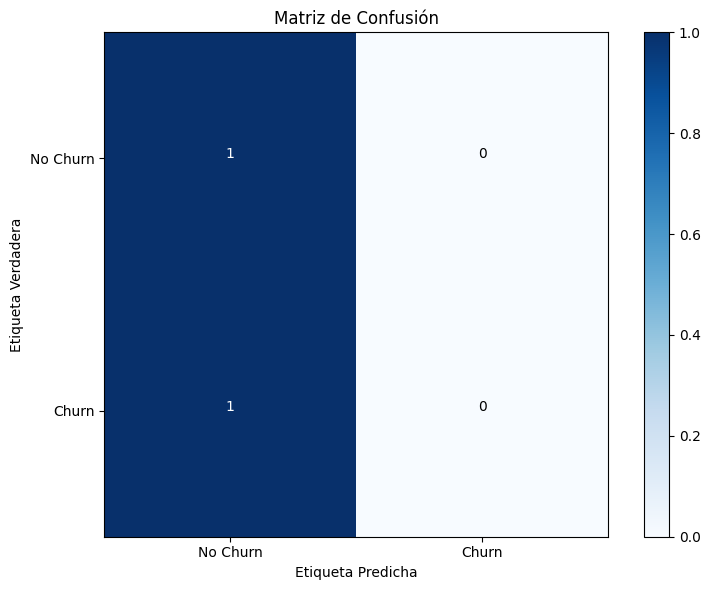

In [ ]:
#GRAFICACIÓN MATRIZ DE CONFUSIÓN DEL ALGORITMO NAIVA BAYES.

cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(cm)

#Ploteo.
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['No Churn', 'Churn'])
plt.yticks(tick_marks, ['No Churn', 'Churn'])

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.tight_layout()
plt.show()